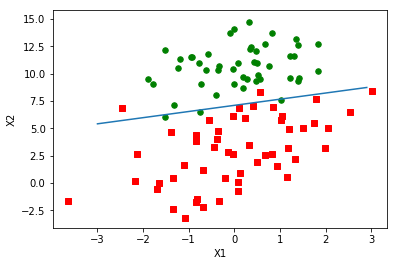

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def init_data():
    data = np.loadtxt('data.csv')
    dataMatIn = data[:, 0:-1]
    classLabels = data[:, -1]
    dataMatIn = np.insert(dataMatIn, 0, 1, axis=1)  #特征数据集，添加1是构造常数项x0
    return dataMatIn, classLabels


def grad_ascent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)  #(m,n)
    labelMat = np.mat(classLabels).transpose()
    m, n = np.shape(dataMatrix)
    weights = np.ones((n, 1))  #初始化回归系数（n, 1)
    alpha = 0.001 #步长
    maxCycle = 500  #最大循环次数

    for i in range(maxCycle):
        h = sigmoid(dataMatrix * weights)  #sigmoid 函数
        error = labelMat - h  #y-h, (m - 1)
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights


def plotBestFIt(weights):
    dataMatIn, classLabels = init_data()
    n = np.shape(dataMatIn)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if classLabels[i] == 1:
            xcord1.append(dataMatIn[i][1])
            ycord1.append(dataMatIn[i][2])
        else:
            xcord2.append(dataMatIn[i][1])
            ycord2.append(dataMatIn[i][2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1,s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3, 3, 0.1)
    y = (-weights[0, 0] - weights[1, 0] * x) / weights[2, 0]  #matix
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()


# 随机梯度上升法的思想是，每次只使用一个数据样本点来更新回归系数。这样就大大减小计算开销
def stoc_grad_ascent(dataMatIn, classLabels):
    m, n = np.shape(dataMatIn)
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatIn[i] * weights))  #数值计算
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatIn[i]
    return weights

# 随机梯度上升法的思想是，每次只使用一个数据样本点来更新回归系数。这样就大大减小计算开销
def stoc_grad_ascent_one(dataMatIn, classLabels, numIter=150):
    m, n = np.shape(dataMatIn)
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4 / (1 + i + j) + 0.01 #保证多次迭代后新数据仍然有影响力
            randIndex = int(np.random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatIn[i] * weights))  # 数值计算
            error = classLabels[i] - h
            weights = weights + alpha * error * dataMatIn[i]
            del(dataIndex[randIndex])
    return weights

# 评价算法优劣势看它是或否收敛，是否达到稳定值，收敛越快，算法越优。

if __name__ == '__main__':
    dataMatIn, classLabels = init_data()
#     print(classLabels.shape)
#     print(np.mat(classLabels).shape)
#     print(dataMatIn)
#     print(classLabels)
    r = stoc_grad_ascent_one(dataMatIn, classLabels)
    r = np.mat(r).transpose()
    plotBestFIt(r)

